In [1]:
#In this cell all libraries used in the notebook are loaded
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import timeit

from ema_workbench import (Model, CategoricalParameter, SequentialEvaluator, MultiprocessingEvaluator, Policy, Scenario, perform_experiments,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import copy

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [15]:
#Here the problem formulation created by group 22 is called as the dike model, and uncertainties and levers are connected to the Workbench
dike_model, planning_steps = get_model_for_problem_formulation(6)
uncertainties = dike_model.uncertainties
levers = dike_model.levers

In [3]:
#This creates a policy where three different combinations of rfr projects are tried
efficient_rfr = [Policy('try 1', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                   Policy('try 2', **{'0_RfR 0':0,
                                      '0_RfR 1':0,
                                      '0_RfR 2':0,
                                      '1_RfR 0':1,
                                      '1_RfR 1':1,
                                      '1_RfR 2':1,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                   Policy('try 3', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':1,
                                      '1_RfR 1':1,
                                      '1_RfR 2':1,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0})]

In [4]:
tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results1 = evaluator.perform_experiments(scenarios=1000, policies=efficient_rfr)
toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 3 policies * 1 model(s) = 3000 experiments
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1500 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] 2100 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2700 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
save_results(results1, 'efficient_rfr.tar.gz')
print('Multiprocessing time in seconds:', toc-tic)

[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\efficient_rfr.tar.gz


Multiprocessing time in seconds: 2226.004958


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


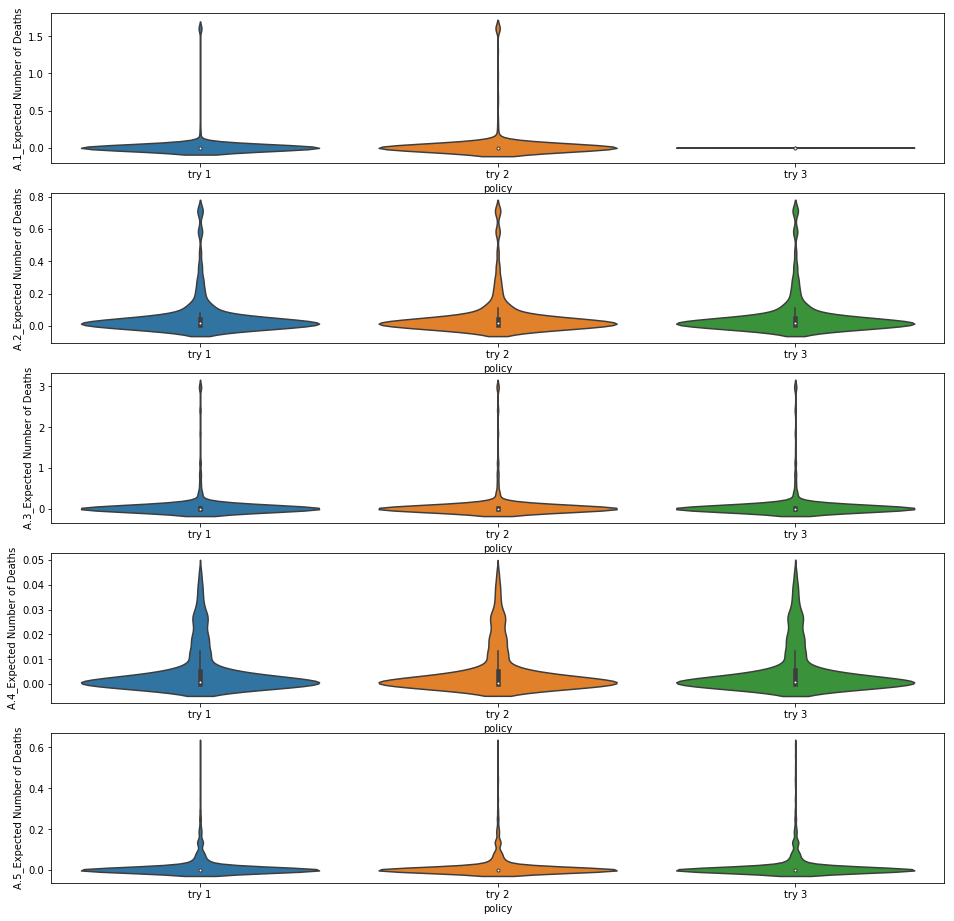

In [6]:
experiments1, outcomes1 = results1
data1 = pd.DataFrame(outcomes1)
data1['policy'] = experiments1['policy']
fig, ax = plt.subplots(figsize=(16,16))
for i in range(1,6):
    plt.subplot(510+i)
    sns.violinplot(data=data1, y='A.{}_Expected Number of Deaths'.format(i), x='policy', scale='width');

In [7]:
#This uses the policy called Try 1 above, but with differing dike heights, excluding location 4
rfr_dikes = [Policy('rfr_dike2', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':2, 
                                      'A.1_DikeIncrease 1':2, 
                                      'A.1_DikeIncrease 2':2,
                                      'A.2_DikeIncrease 0':2,
                                      'A.2_DikeIncrease 1':2,
                                      'A.2_DikeIncrease 2':2,
                                      'A.3_DikeIncrease 0':2,
                                      'A.3_DikeIncrease 1':2,
                                      'A.3_DikeIncrease 2':2,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':2,
                                      'A.5_DikeIncrease 1':2,
                                      'A.5_DikeIncrease 2':2}),
             Policy('rfr_dike4', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':4, 
                                      'A.1_DikeIncrease 1':4, 
                                      'A.1_DikeIncrease 2':4,
                                      'A.2_DikeIncrease 0':4,
                                      'A.2_DikeIncrease 1':4,
                                      'A.2_DikeIncrease 2':4,
                                      'A.3_DikeIncrease 0':4,
                                      'A.3_DikeIncrease 1':4,
                                      'A.3_DikeIncrease 2':4,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':4,
                                      'A.5_DikeIncrease 1':4,
                                      'A.5_DikeIncrease 2':4}),
             Policy('rfr_dike6', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':6, 
                                      'A.1_DikeIncrease 1':6, 
                                      'A.1_DikeIncrease 2':6,
                                      'A.2_DikeIncrease 0':6,
                                      'A.2_DikeIncrease 1':6,
                                      'A.2_DikeIncrease 2':6,
                                      'A.3_DikeIncrease 0':6,
                                      'A.3_DikeIncrease 1':6,
                                      'A.3_DikeIncrease 2':6,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':6,
                                      'A.5_DikeIncrease 1':6,
                                      'A.5_DikeIncrease 2':6}),
             Policy('rfr_dike8', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':8, 
                                      'A.1_DikeIncrease 1':8, 
                                      'A.1_DikeIncrease 2':8,
                                      'A.2_DikeIncrease 0':8,
                                      'A.2_DikeIncrease 1':8,
                                      'A.2_DikeIncrease 2':8,
                                      'A.3_DikeIncrease 0':8,
                                      'A.3_DikeIncrease 1':8,
                                      'A.3_DikeIncrease 2':8,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':8,
                                      'A.5_DikeIncrease 1':8,
                                      'A.5_DikeIncrease 2':8})]

In [8]:
tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results2 = evaluator.perform_experiments(scenarios=1000, policies=rfr_dikes)
toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2800 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
save_results(results2, 'rfr_dikes.tar.gz')
print('Multiprocessing time in seconds:', toc-tic)

[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\rfr_dikes.tar.gz


Multiprocessing time in seconds: 3068.4724261000006


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


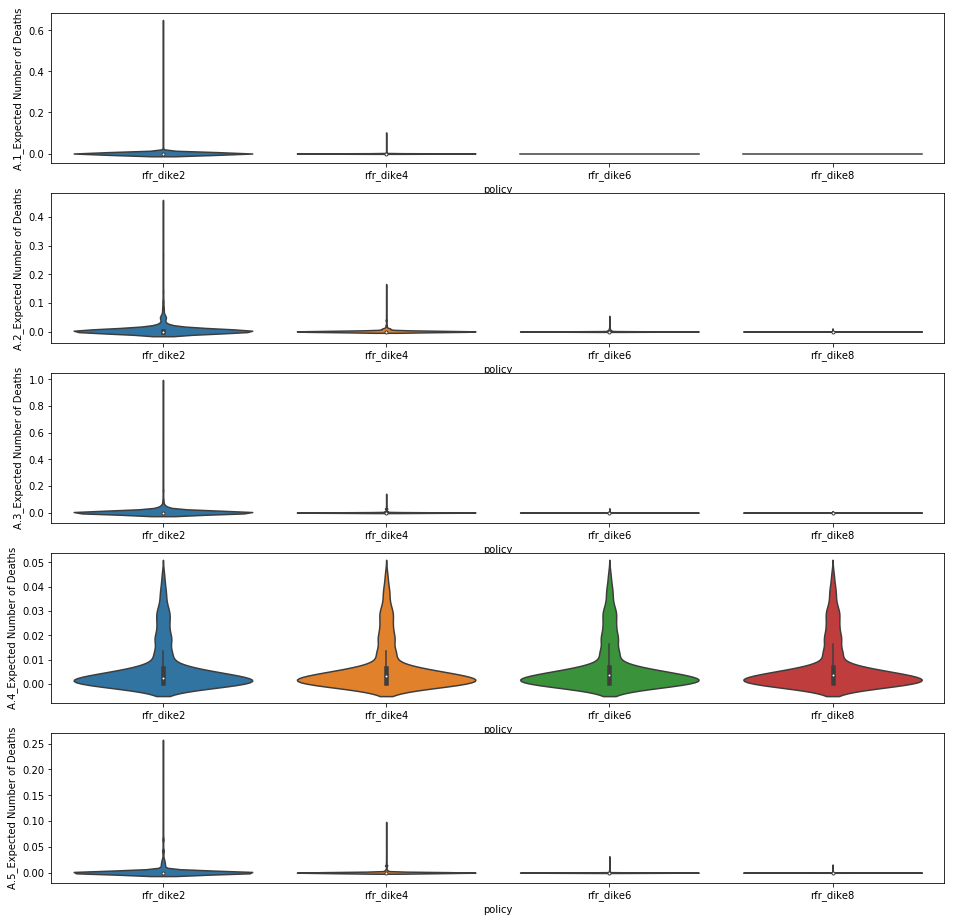

In [10]:
experiments2, outcomes2 = results2
data2 = pd.DataFrame(outcomes2)
data2['policy'] = experiments2['policy']
fig, ax = plt.subplots(figsize=(16,16))
for i in range(1,6):
    plt.subplot(510+i)
    sns.violinplot(data=data2, y='A.{}_Expected Number of Deaths'.format(i), x='policy', scale='width');

In [11]:
dike_costs = pd.DataFrame(outcomes2, columns = ['Dike Investment Costs'])
dike_costs['policy'] = experiments2['policy']
dike_short = dike_costs.drop_duplicates(['Dike Investment Costs', 'policy'])
dike_short

,Dike Investment Costs,policy
0,4.171573e+08,rfr_dike2
1000,5.557664e+08,rfr_dike4
2000,7.381708e+08,rfr_dike6
3000,9.782373e+08,rfr_dike8


In [12]:
#Here the results from the above policies were combined and refined, unfortunately the tried combinations were overwritten and only the final one remains
best_policy = [Policy('best_policy', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':4, 
                                      'A.1_DikeIncrease 1':4, 
                                      'A.1_DikeIncrease 2':4,
                                      'A.2_DikeIncrease 0':6,
                                      'A.2_DikeIncrease 1':6,
                                      'A.2_DikeIncrease 2':6,
                                      'A.3_DikeIncrease 0':6,
                                      'A.3_DikeIncrease 1':6,
                                      'A.3_DikeIncrease 2':6,
                                      'A.4_DikeIncrease 0':3,
                                      'A.4_DikeIncrease 1':3,
                                      'A.4_DikeIncrease 2':3,
                                      'A.5_DikeIncrease 0':5,
                                      'A.5_DikeIncrease 1':5,
                                      'A.5_DikeIncrease 2':5})]

In [13]:
tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results3 = evaluator.perform_experiments(scenarios=1000, policies=best_policy)
toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [14]:
save_results(results3, 'best_policy.tar.gz')
print('Multiprocessing time in seconds:', toc-tic)

[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\best_policy.tar.gz


Multiprocessing time in seconds: 811.9840851999998


[MainProcess/INFO] results loaded succesfully from C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\best_policy.tar.gz
C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


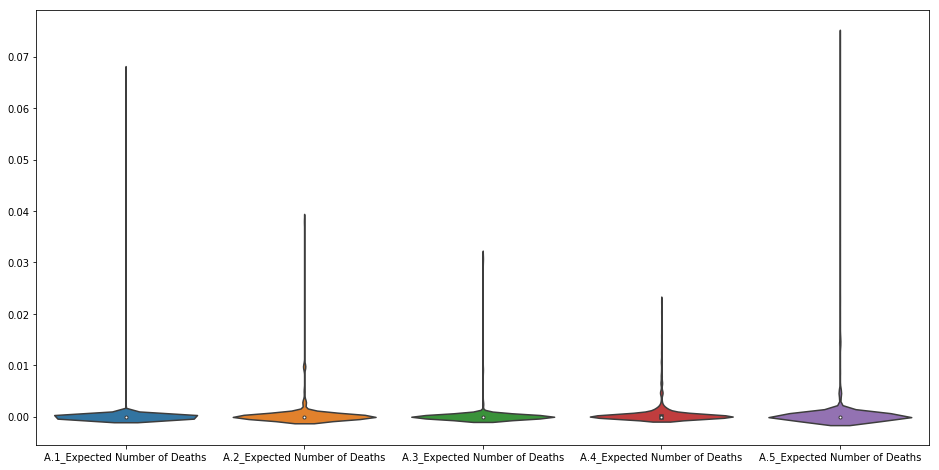

In [54]:
experiments3, outcomes3 = load_results('best_policy.tar.gz')
data3 = pd.DataFrame(outcomes3)
data3['policy'] = experiments3['policy']
deaths = pd.DataFrame(outcomes3, columns = ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
                                         'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'])
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=deaths, scale='width');

In [55]:
total_deaths = sum(data3['A.1_Expected Number of Deaths'][0:1000] > 0.01) +sum(data3['A.2_Expected Number of Deaths'][0:1000] > 0.01)+sum(data3['A.3_Expected Number of Deaths'][0:1000] > 0.01)+sum(data3['A.4_Expected Number of Deaths'][0:1000] > 0.01)+sum(data3['A.5_Expected Number of Deaths'][0:1000]> 0.01)
print(total_deaths)

34


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1396701510.4885597

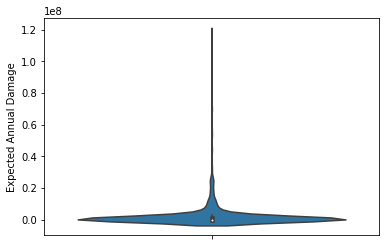

In [16]:
sns.violinplot(data=data3, y='Expected Annual Damage');
data3['Dike Investment Costs'][0]+data3['RfR Investment Costs'][0]

### Comparison with dikes
The following cells call the data from PG.2 to compare to the results of the above policy

In [2]:
full_dike_experiments, full_dike_outcomes = load_results('full_dike_policies.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\full_dike_policies.tar.gz


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


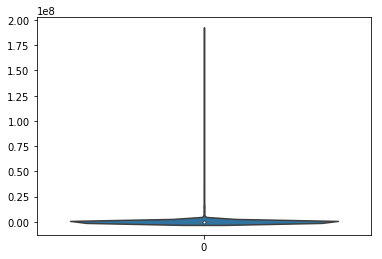

In [3]:
dike_comparison = pd.DataFrame(full_dike_outcomes['Expected Annual Damage'][full_dike_experiments['policy'] == 'full dike policy10'])
dike_deaths = pd.DataFrame(full_dike_outcomes, columns=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
                                         'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'])
dike10_deaths =dike_deaths[full_dike_experiments['policy'] == 'full dike policy10']
sns.violinplot(data=dike_comparison)
print('';

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The number of scenarios in which deaths exceed 0.01 is: 8
The maximum regret is: 0.2485926111024625


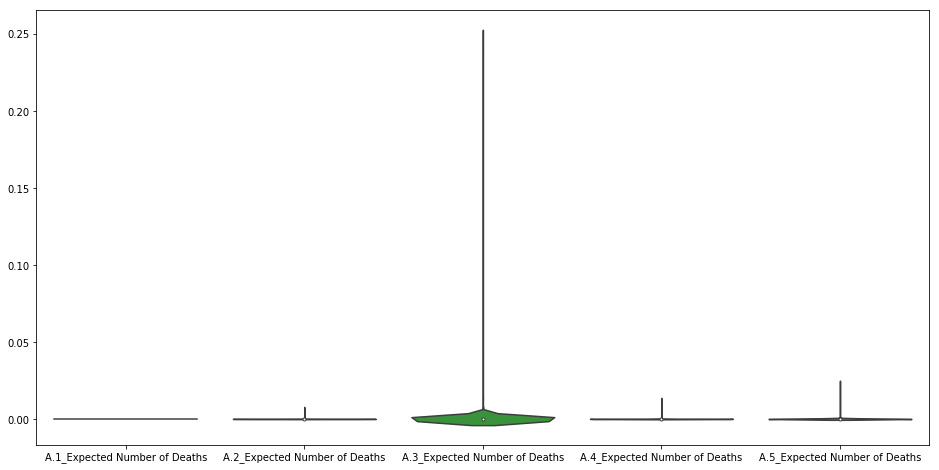

In [59]:
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=dike10_deaths, scale='width')
total_deaths = sum(dike10_deaths['A.1_Expected Number of Deaths'] > 0.01) +sum(dike10_deaths['A.2_Expected Number of Deaths'] > 0.01)+sum(dike10_deaths['A.3_Expected Number of Deaths'] > 0.01)+sum(dike10_deaths['A.4_Expected Number of Deaths'] > 0.01)+sum(dike10_deaths['A.5_Expected Number of Deaths'] > 0.01)
print('The number of scenarios in which deaths exceed 0.01 is:', total_deaths)
print('The maximum regret is:', dike10_deaths['A.3_Expected Number of Deaths'].max())

### Combination with ews
The final part combines the above policy with different ews days

In [12]:
best_policy_ews = [Policy('best_policy_ews1', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':1,
                                      'A.1_DikeIncrease 0':4, 
                                      'A.1_DikeIncrease 1':4, 
                                      'A.1_DikeIncrease 2':4,
                                      'A.2_DikeIncrease 0':6,
                                      'A.2_DikeIncrease 1':6,
                                      'A.2_DikeIncrease 2':6,
                                      'A.3_DikeIncrease 0':6,
                                      'A.3_DikeIncrease 1':6,
                                      'A.3_DikeIncrease 2':6,
                                      'A.4_DikeIncrease 0':3,
                                      'A.4_DikeIncrease 1':3,
                                      'A.4_DikeIncrease 2':3,
                                      'A.5_DikeIncrease 0':5,
                                      'A.5_DikeIncrease 1':5,
                                      'A.5_DikeIncrease 2':5}),
                  Policy('best_policy_ews2', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':2,
                                      'A.1_DikeIncrease 0':4, 
                                      'A.1_DikeIncrease 1':4, 
                                      'A.1_DikeIncrease 2':4,
                                      'A.2_DikeIncrease 0':6,
                                      'A.2_DikeIncrease 1':6,
                                      'A.2_DikeIncrease 2':6,
                                      'A.3_DikeIncrease 0':6,
                                      'A.3_DikeIncrease 1':6,
                                      'A.3_DikeIncrease 2':6,
                                      'A.4_DikeIncrease 0':3,
                                      'A.4_DikeIncrease 1':3,
                                      'A.4_DikeIncrease 2':3,
                                      'A.5_DikeIncrease 0':5,
                                      'A.5_DikeIncrease 1':5,
                                      'A.5_DikeIncrease 2':5}),
                  Policy('best_policy_ews3', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':3,
                                      'A.1_DikeIncrease 0':4, 
                                      'A.1_DikeIncrease 1':4, 
                                      'A.1_DikeIncrease 2':4,
                                      'A.2_DikeIncrease 0':6,
                                      'A.2_DikeIncrease 1':6,
                                      'A.2_DikeIncrease 2':6,
                                      'A.3_DikeIncrease 0':6,
                                      'A.3_DikeIncrease 1':6,
                                      'A.3_DikeIncrease 2':6,
                                      'A.4_DikeIncrease 0':3,
                                      'A.4_DikeIncrease 1':3,
                                      'A.4_DikeIncrease 2':3,
                                      'A.5_DikeIncrease 0':5,
                                      'A.5_DikeIncrease 1':5,
                                      'A.5_DikeIncrease 2':5}),
                  Policy('best_policy_ews4', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':0,
                                      '1_RfR 1':0,
                                      '1_RfR 2':0,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':0,
                                      '4_RfR 1':0, 
                                      '4_RfR 2':0, 
                                      'EWS_DaysToThreat':4,
                                      'A.1_DikeIncrease 0':4, 
                                      'A.1_DikeIncrease 1':4, 
                                      'A.1_DikeIncrease 2':4,
                                      'A.2_DikeIncrease 0':6,
                                      'A.2_DikeIncrease 1':6,
                                      'A.2_DikeIncrease 2':6,
                                      'A.3_DikeIncrease 0':6,
                                      'A.3_DikeIncrease 1':6,
                                      'A.3_DikeIncrease 2':6,
                                      'A.4_DikeIncrease 0':3,
                                      'A.4_DikeIncrease 1':3,
                                      'A.4_DikeIncrease 2':3,
                                      'A.5_DikeIncrease 0':5,
                                      'A.5_DikeIncrease 1':5,
                                      'A.5_DikeIncrease 2':5})]

In [24]:
tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results4 = evaluator.perform_experiments(scenarios=1000, policies=best_policy_ews)
toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2800 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [40]:
save_results(results4, 'best_policy_ews.tar.gz')
print('Multiprocessing time in seconds:', toc-tic)

[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\best_policy_ews.tar.gz


Multiprocessing time in seconds: 2894.0609585


In [26]:
experiments4, outcomes4 = load_results('best_policy_ews.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\best_policy_ews.tar.gz


In [60]:
data4 = pd.DataFrame(outcomes4)
data4['policy'] = experiments4['policy']
deaths4 = pd.DataFrame(outcomes4, columns = ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
                                         'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'])

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


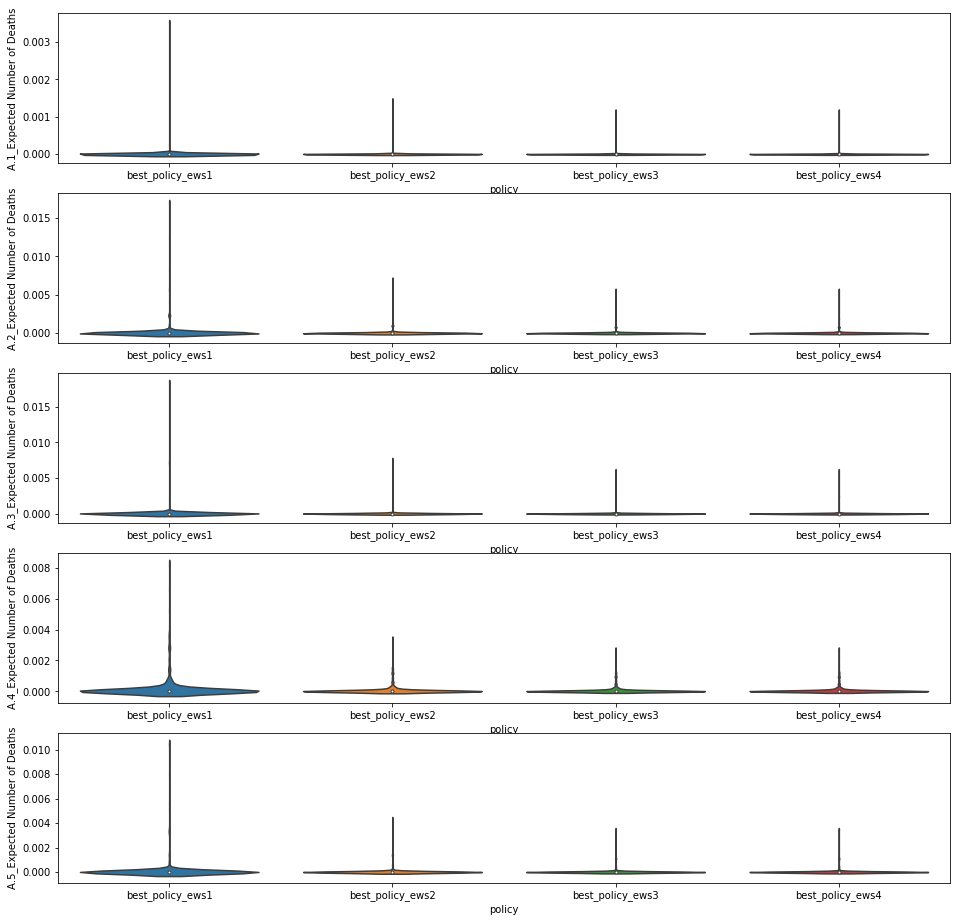

In [28]:
fig, ax = plt.subplots(figsize=(16,16))
for i in range(1,6):
    plt.subplot(510+i)
    sns.violinplot(data=data4, y='A.{}_Expected Number of Deaths'.format(i), x='policy', scale='width');

Applying ews, even with 1 day warning, has a huge influence. From 2 days and more, it decreases but less dramatically.

In [61]:
total_deaths = sum(data4['A.1_Expected Number of Deaths'][1000:2000] > 0.01) +sum(data4['A.2_Expected Number of Deaths'][1000:2000] > 0.01)+sum(data4['A.3_Expected Number of Deaths'][1000:2000] > 0.01)+sum(data4['A.4_Expected Number of Deaths'][1000:2000] > 0.01)+sum(data4['A.5_Expected Number of Deaths'][1000:2000]> 0.01)
print('Scenarios in which deaths exceed 0.01:',total_deaths)

Scenarios in which deaths exceed 0.01: 0


Total costs of dikes and rfr, with maximum evacuation costs for 2 day ews: 1396705220.8465326


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


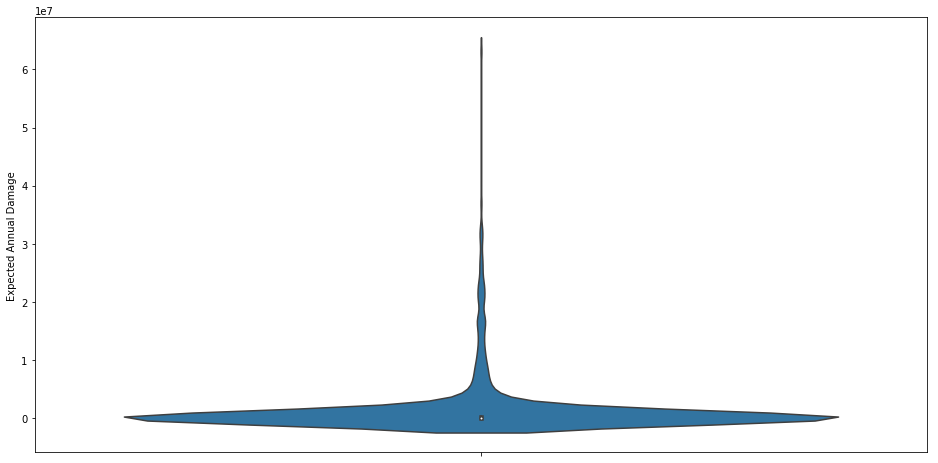

In [62]:
print('Total costs of dikes and rfr, with maximum evacuation costs for 2 day ews:', data4['Dike Investment Costs'][0]+data4['RfR Investment Costs'][0]+data4['Evacuation Costs'][1000:2000].max())
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=data4[0:1000], y='Expected Annual Damage');